In [119]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from tabulate import tabulate
from copy import deepcopy

# Load data from data.json
with open('data.json', 'r') as file:
    data = json.load(file)

In [132]:
def plot_probabilities(data, filter=None):
    filtered_data = deepcopy(data)
    filter_name = 'All'

    if filter == "repeats":
        # Filter data to include only words with a single unique letter
        filtered_data = {word: probs for word, probs in filtered_data.items() if len(set(word)) == 1}
        filter_name = 'Single-Letter'
    elif filter == "random":
        # Load random words from random_words.json
        with open('lists/random_words.json', 'r') as file:
            random_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in random_words if word in filtered_data}
        filter_name = 'Real'
    elif filter == "shuffled":
        # Load shuffled words from shuffled_words.json
        with open('lists/shuffled_words.json', 'r') as file:
            shuffled_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in shuffled_words if word in filtered_data}
        filter_name = 'Scrambled'
    elif filter == "long":
        with open('lists/long_coded_words.json', 'r') as file:
            long_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in long_words if word in filtered_data}
        filter_name = 'Long-Coded'
    elif filter == "short":
        with open('lists/short_coded_words.json', 'r') as file:
            short_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in short_words if word in filtered_data}
        filter_name = 'Short-Coded'
        
    # Initialize dictionaries to store sums and counts for each word length
    length_sums = {}
    length_counts = {}

    # Iterate through the data and collect word lengths and probabilities
    for word, probs in filtered_data.items():
        word_length = len(word)
        if word_length not in length_sums:
            length_sums[word_length] = {
                "gpt-3.5-turbo-0125": 0,
                "gpt-4": 0,
                "meta-llama/Llama-2-7b-chat-hf": 0,
                "meta-llama/Meta-Llama-3-8B-Instruct": 0
            }
            length_counts[word_length] = 0

        length_sums[word_length]["gpt-3.5-turbo-0125"] += probs["gpt-3.5-turbo-0125"]
        length_sums[word_length]["gpt-4"] += probs["gpt-4"]
        length_sums[word_length]["meta-llama/Llama-2-7b-chat-hf"] += probs["meta-llama/Llama-2-7b-chat-hf"]
        length_sums[word_length]["meta-llama/Meta-Llama-3-8B-Instruct"] += probs["meta-llama/Meta-Llama-3-8B-Instruct"]
        length_counts[word_length] += 1

    # Calculate average probabilities for each word length
    word_lengths = sorted(length_sums.keys())
    gpt_3_5_avg_probs = [length_sums[length]["gpt-3.5-turbo-0125"] / length_counts[length] for length in word_lengths]
    gpt_4_avg_probs = [length_sums[length]["gpt-4"] / length_counts[length] for length in word_lengths]
    llama_2_avg_probs = [length_sums[length]["meta-llama/Llama-2-7b-chat-hf"] / length_counts[length] for length in word_lengths]
    llama_3_avg_probs = [length_sums[length]["meta-llama/Meta-Llama-3-8B-Instruct"] / length_counts[length] for length in word_lengths]

    # Plot the data
    plt.figure(figsize=(12, 8))

    plt.plot(word_lengths, gpt_4_avg_probs, label="gpt-4", marker='o')
    plt.plot(word_lengths, gpt_3_5_avg_probs, label="gpt-3.5-turbo-0125", marker='o')
    plt.plot(word_lengths, llama_3_avg_probs, label="meta-llama/Meta-Llama-3-8B-Instruct", marker='o')
    plt.plot(word_lengths, llama_2_avg_probs, label="meta-llama/Llama-2-7b-chat-hf", marker='o')

    plt.xlabel('Word Length')
    plt.ylabel('Average Probability')
    plt.title('Average P(Long) by Word Length' + (f' ({filter_name} Words)'))
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(word_lengths), max(word_lengths) + 1, 1))
    plt.show()

In [133]:
def plot_shuffled_random_diffs(data):
    # Load random words from random_words.json
    with open('lists/random_words.json', 'r') as file:
        random_words = json.load(file)
    random_filtered_data = {word: data[word] for word in random_words if word in data}
    
    # Load shuffled words from shuffled_words.json
    with open('lists/shuffled_words.json', 'r') as file:
        shuffled_words = json.load(file)
    shuffled_filtered_data = {word: data[word] for word in shuffled_words if word in data}
    
    # Initialize dictionaries to store sums and counts for each word length for both random and shuffled data
    random_length_sums = {}
    random_length_counts = {}
    shuffled_length_sums = {}
    shuffled_length_counts = {}
    
    # Iterate through the random filtered data and collect word lengths and probabilities
    for word, probs in random_filtered_data.items():
        word_length = len(word)
        if word_length not in random_length_sums:
            random_length_sums[word_length] = {
                "gpt-3.5-turbo-0125": 0,
                "gpt-4": 0,
                "meta-llama/Llama-2-7b-chat-hf": 0,
                "meta-llama/Meta-Llama-3-8B-Instruct": 0
            }
            random_length_counts[word_length] = 0

        random_length_sums[word_length]["gpt-3.5-turbo-0125"] += probs["gpt-3.5-turbo-0125"]
        random_length_sums[word_length]["gpt-4"] += probs["gpt-4"]
        random_length_sums[word_length]["meta-llama/Llama-2-7b-chat-hf"] += probs["meta-llama/Llama-2-7b-chat-hf"]
        random_length_sums[word_length]["meta-llama/Meta-Llama-3-8B-Instruct"] += probs["meta-llama/Meta-Llama-3-8B-Instruct"]
        random_length_counts[word_length] += 1
    
    # Iterate through the shuffled filtered data and collect word lengths and probabilities
    for word, probs in shuffled_filtered_data.items():
        word_length = len(word)
        if word_length not in shuffled_length_sums:
            shuffled_length_sums[word_length] = {
                "gpt-3.5-turbo-0125": 0,
                "gpt-4": 0,
                "meta-llama/Llama-2-7b-chat-hf": 0,
                "meta-llama/Meta-Llama-3-8B-Instruct": 0
            }
            shuffled_length_counts[word_length] = 0

        shuffled_length_sums[word_length]["gpt-3.5-turbo-0125"] += probs["gpt-3.5-turbo-0125"]
        shuffled_length_sums[word_length]["gpt-4"] += probs["gpt-4"]
        shuffled_length_sums[word_length]["meta-llama/Llama-2-7b-chat-hf"] += probs["meta-llama/Llama-2-7b-chat-hf"]
        shuffled_length_sums[word_length]["meta-llama/Meta-Llama-3-8B-Instruct"] += probs["meta-llama/Meta-Llama-3-8B-Instruct"]
        shuffled_length_counts[word_length] += 1
    
    # Calculate average probabilities for each word length for both random and shuffled data
    word_lengths = sorted(set(random_length_sums.keys()).intersection(set(shuffled_length_sums.keys())))
    gpt_3_5_avg_probs_diff = [(random_length_sums[length]["gpt-3.5-turbo-0125"] / random_length_counts[length]) - (shuffled_length_sums[length]["gpt-3.5-turbo-0125"] / shuffled_length_counts[length]) for length in word_lengths]
    gpt_4_avg_probs_diff = [(random_length_sums[length]["gpt-4"] / random_length_counts[length]) - (shuffled_length_sums[length]["gpt-4"] / shuffled_length_counts[length]) for length in word_lengths]
    llama_2_avg_probs_diff = [(random_length_sums[length]["meta-llama/Llama-2-7b-chat-hf"] / random_length_counts[length]) - (shuffled_length_sums[length]["meta-llama/Llama-2-7b-chat-hf"] / shuffled_length_counts[length]) for length in word_lengths]
    llama_3_avg_probs_diff = [(random_length_sums[length]["meta-llama/Meta-Llama-3-8B-Instruct"] / random_length_counts[length]) - (shuffled_length_sums[length]["meta-llama/Meta-Llama-3-8B-Instruct"] / shuffled_length_counts[length]) for length in word_lengths]
    
    # Plot the data
    plt.figure(figsize=(12, 8))

    plt.plot(word_lengths, gpt_4_avg_probs_diff, label="gpt-4", marker='o')
    plt.plot(word_lengths, gpt_3_5_avg_probs_diff, label="gpt-3.5-turbo-0125", marker='o')
    plt.plot(word_lengths, llama_3_avg_probs_diff, label="meta-llama/Meta-Llama-3-8B-Instruct", marker='o')
    plt.plot(word_lengths, llama_2_avg_probs_diff, label="meta-llama/Llama-2-7b-chat-hf", marker='o')

    plt.xlabel('Word Length')
    plt.ylabel('Average Probability Difference')
    plt.title('Average P(Long) by Word Length (Random - Shuffled)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(word_lengths), max(word_lengths) + 1, 1))
    plt.show()

In [134]:
def plot_avg_probabilities_by_token_count(data, filter=None):
    filtered_data = deepcopy(data)
    filter_name = 'All'

    if filter == "repeats":
        # Filter data to include only words with a single unique letter
        filtered_data = {word: probs for word, probs in filtered_data.items() if len(set(word)) == 1}
        filter_name = 'Single-Letter'
    elif filter == "random":
        # Load random words from random_words.json
        with open('lists/random_words.json', 'r') as file:
            random_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in random_words if word in filtered_data}
        filter_name = 'Real'
    elif filter == "shuffled":
        # Load shuffled words from shuffled_words.json
        with open('lists/shuffled_words.json', 'r') as file:
            shuffled_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in shuffled_words if word in filtered_data}
        filter_name = 'Scrambled' 
    elif filter == "long":
        with open('lists/long_coded_words.json', 'r') as file:
            long_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in long_words if word in filtered_data}
        filter_name = 'Long-Coded'
    elif filter == "short":
        with open('lists/short_coded_words.json', 'r') as file:
            short_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in short_words if word in filtered_data}
        filter_name = 'Short-Coded'

    # Calculate average probabilities for each token length for each model
    token_lengths = sorted(set(len(probs["gpt_tokens"]) for probs in filtered_data.values()).union(
                           set(len(probs["llama2_tokens"]) for probs in filtered_data.values())).union(
                           set(len(probs["llama3_tokens"]) for probs in filtered_data.values())))

    gpt_3_5_avg_probs = []
    gpt_4_avg_probs = []
    llama_2_avg_probs = []
    llama_3_avg_probs = []

    for length in token_lengths:
        gpt_3_5_probs = [probs["gpt-3.5-turbo-0125"] for probs in filtered_data.values() if len(probs["gpt_tokens"]) == length]
        gpt_4_probs = [probs["gpt-4"] for probs in filtered_data.values() if len(probs["gpt_tokens"]) == length]
        llama_2_probs = [probs["meta-llama/Llama-2-7b-chat-hf"] for probs in filtered_data.values() if len(probs["llama2_tokens"]) == length]
        llama_3_probs = [probs["meta-llama/Meta-Llama-3-8B-Instruct"] for probs in filtered_data.values() if len(probs["llama3_tokens"]) == length]

        if gpt_3_5_probs:
            gpt_3_5_avg_probs.append((length, sum(gpt_3_5_probs) / len(gpt_3_5_probs)))
        if gpt_4_probs:
            gpt_4_avg_probs.append((length, sum(gpt_4_probs) / len(gpt_4_probs)))
        if llama_2_probs:
            llama_2_avg_probs.append((length, sum(llama_2_probs) / len(llama_2_probs)))
        if llama_3_probs:
            llama_3_avg_probs.append((length, sum(llama_3_probs) / len(llama_3_probs)))

    # Plot the data
    plt.figure(figsize=(12, 8))

    if gpt_4_avg_probs:
        plt.plot(*zip(*gpt_4_avg_probs), label="gpt-4", marker='o')
    if gpt_3_5_avg_probs:
        plt.plot(*zip(*gpt_3_5_avg_probs), label="gpt-3.5-turbo-0125", marker='o')
    if llama_3_avg_probs:
        plt.plot(*zip(*llama_3_avg_probs), label="meta-llama/Meta-Llama-3-8B-Instruct", marker='o')
    if llama_2_avg_probs:
        plt.plot(*zip(*llama_2_avg_probs), label="meta-llama/Llama-2-7b-chat-hf", marker='o')

    plt.xlabel('Token Count')
    plt.ylabel('Average Probability')
    plt.title(f'Average P(Long) by Token Count ({filter_name} Words)')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(token_lengths), max(token_lengths) + 1, 1))
    plt.show()

# Example usage
plot_avg_probabilities_by_token_count(data)
plot_avg_probabilities_by_token_count(data, filter="repeats")
plot_avg_probabilities_by_token_count(data, filter="random")
plot_avg_probabilities_by_token_count(data, filter="shuffled")
plot_avg_probabilities_by_token_count(data, filter="long")
plot_avg_probabilities_by_token_count(data, filter="short")

KeyError: 'gpt_tokens'

In [135]:
plot_probabilities(data)
plot_probabilities(data, filter="repeats")
plot_probabilities(data, filter="random")
plot_probabilities(data, filter="shuffled")
plot_probabilities(data, filter="long")
plot_probabilities(data, filter="short")

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10738f8c0>>
Traceback (most recent call last):
  File "/Users/arjun/arjun/code/long_short/venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


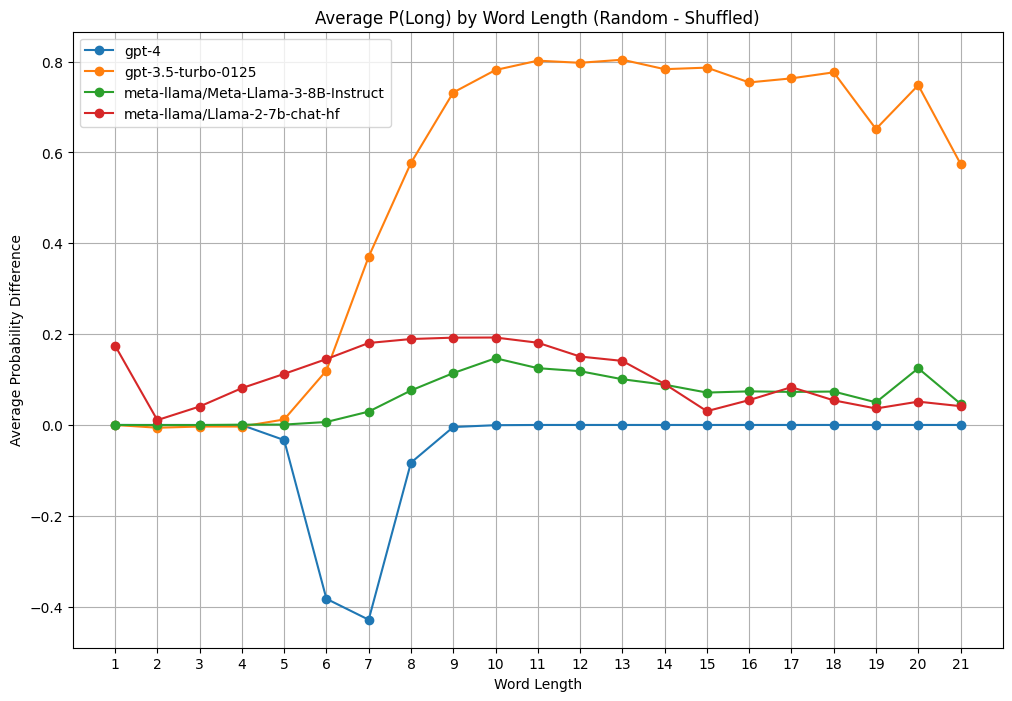

In [92]:
plot_shuffled_random_diffs(data)

In [84]:
from scipy.stats import pearsonr

def characters_vs_probabilities_correlation(data, filter=None):
    filtered_data = deepcopy(data)

    if filter == "repeats":
        filtered_data = {word: probs for word, probs in filtered_data.items() if len(set(word)) == 1}
    elif filter == "random":
        with open('lists/random_words.json', 'r') as file:
            random_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in random_words if word in filtered_data}
    elif filter == "shuffled":
        with open('lists/shuffled_words.json', 'r') as file:
            shuffled_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in shuffled_words if word in filtered_data}

    models = ["gpt-4", "gpt-3.5-turbo-0125", "meta-llama/Meta-Llama-3-8B-Instruct", "meta-llama/Llama-2-7b-chat-hf"]
    correlations = {model: [] for model in models}

    for model in models:
        word_lengths = []
        probabilities = []
        for word, probs in filtered_data.items():
            if model in probs:
                word_lengths.append(len(word))
                probabilities.append(probs[model])
        
        if word_lengths and probabilities:
            correlation, _ = pearsonr(word_lengths, probabilities)
            correlations[model] = correlation
        else:
            correlations[model] = None

    return correlations

In [85]:
def token_count_vs_probabilities_correlation(data, filter=None):
    filtered_data = deepcopy(data)

    if filter == "repeats":
        filtered_data = {word: probs for word, probs in filtered_data.items() if len(set(word)) == 1}
    elif filter == "random":
        with open('lists/random_words.json', 'r') as file:
            random_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in random_words if word in filtered_data}
    elif filter == "shuffled":
        with open('lists/shuffled_words.json', 'r') as file:
            shuffled_words = json.load(file)
        filtered_data = {word: filtered_data[word] for word in shuffled_words if word in filtered_data}

    model_token_map = {
        "gpt-4": "gpt_tokens",
        "gpt-3.5-turbo-0125": "gpt_tokens",
        "meta-llama/Meta-Llama-3-8B-Instruct": "llama2_tokens",
        "meta-llama/Llama-2-7b-chat-hf": "llama3_tokens"
    }
    correlations = {model: [] for model in model_token_map.keys()}

    for model, token_attr in model_token_map.items():
        token_counts = []
        probabilities = []
        for probs in filtered_data.values():
            if model in probs and token_attr in probs:
                token_counts.append(len(probs[token_attr]))
                probabilities.append(probs[model])
        
        if token_counts and probabilities:
            correlation, _ = pearsonr(token_counts, probabilities)
            correlations[model] = correlation
        else:
            correlations[model] = None

    return correlations

# Example usage
token_count_correlations = token_count_vs_probabilities_correlation(data)
pprint(token_count_correlations)

{'gpt-3.5-turbo-0125': -0.14212143492868623,
 'gpt-4': 0.4531684065706986,
 'meta-llama/Llama-2-7b-chat-hf': 0.36118675049555127,
 'meta-llama/Meta-Llama-3-8B-Instruct': 0.4697959551803392}


In [86]:
print('== All Words ==:')
# Example usage
pprint(characters_vs_probabilities_correlation(data))
pprint(token_count_vs_probabilities_correlation(data))

== All Words ==:
{'gpt-3.5-turbo-0125': 0.40169991793545784,
 'gpt-4': 0.6149115787075531,
 'meta-llama/Llama-2-7b-chat-hf': 0.6935237303319327,
 'meta-llama/Meta-Llama-3-8B-Instruct': 0.8148340449702107}
{'gpt-3.5-turbo-0125': -0.14212143492868623,
 'gpt-4': 0.4531684065706986,
 'meta-llama/Llama-2-7b-chat-hf': 0.36118675049555127,
 'meta-llama/Meta-Llama-3-8B-Instruct': 0.4697959551803392}


In [87]:
c = characters_vs_probabilities_correlation(data)
t = token_count_vs_probabilities_correlation(data)
print('All Words\n\n', tabulate([[key, c[key], t[key]] for key in c], headers=['Model', 'Character Correlation', 'Token Count Correlation']))

print('\n\nSingle-Letter Words\n\n')
c = characters_vs_probabilities_correlation(data, filter='repeats')
t = token_count_vs_probabilities_correlation(data, filter='repeats')
print(tabulate([[key, c[key], t[key]] for key in c], headers=['Model', 'Character Correlation', 'Token Count Correlation']))

print('\n\nReal Words\n\n')
c = characters_vs_probabilities_correlation(data, filter='random')
t = token_count_vs_probabilities_correlation(data, filter='random')
print(tabulate([[key, c[key], t[key]] for key in c], headers=['Model', 'Character Correlation', 'Token Count Correlation']))

print('\n\nScrambled Words\n\n')
c = characters_vs_probabilities_correlation(data, filter='shuffled')
t = token_count_vs_probabilities_correlation(data, filter='shuffled')
print(tabulate([[key, c[key], t[key]] for key in c], headers=['Model', 'Character Correlation', 'Token Count Correlation']))


All Words

 Model                                  Character Correlation    Token Count Correlation
-----------------------------------  -----------------------  -------------------------
gpt-4                                               0.614912                   0.453168
gpt-3.5-turbo-0125                                  0.4017                    -0.142121
meta-llama/Meta-Llama-3-8B-Instruct                 0.814834                   0.469796
meta-llama/Llama-2-7b-chat-hf                       0.693524                   0.361187


Single-Letter Words


Model                                  Character Correlation    Token Count Correlation
-----------------------------------  -----------------------  -------------------------
gpt-4                                               0.849355                   0.66269
gpt-3.5-turbo-0125                                  0.795139                   0.582146
meta-llama/Meta-Llama-3-8B-Instruct                 0.795194                   0.6536

In [62]:
print(c)

{'gpt-4': None, 'gpt-3.5-turbo-0125': None, 'meta-llama/Meta-Llama-3-8B-Instruct': None, 'meta-llama/Llama-2-7b-chat-hf': None}


In [63]:
filtered_data = data.copy()
with open('lists/shuffled_words.json', 'r') as file:
    shuffled_words = json.load(file)
filtered_data = {word: filtered_data[word] for word in shuffled_words if word in filtered_data}


In [64]:
filtered_data

{'epgheetiet': {'gpt-3.5-turbo-0125': 0.5385931325077186,
  'gpt-4': 1,
  'meta-llama/Llama-2-7b-chat-hf': 0.3087977388872965,
  'meta-llama/Meta-Llama-3-8B-Instruct': 0.758075722321114,
  'gpt_tokens': ['ep', 'g', 'heet', 'iet'],
  'llama2_tokens': ['e', 'pg', 'heet', 'iet'],
  'llama3_tokens': ['ep', 'g', 'heet', 'iet']},
 'rtlonilmre': {'gpt-3.5-turbo-0125': 0.48732457889819863,
  'gpt-4': 1,
  'meta-llama/Llama-2-7b-chat-hf': 0.7096231799251508,
  'meta-llama/Meta-Llama-3-8B-Instruct': 0.9054384658436518,
  'gpt_tokens': ['rt', 'lon', 'ilm', 're'],
  'llama2_tokens': ['r', 't', 'lon', 'il', 'm', 're'],
  'llama3_tokens': ['rt', 'lon', 'ilm', 're']},
 'xcybpemtemia': {'gpt-3.5-turbo-0125': 0.40644687253362166,
  'gpt-4': 1,
  'meta-llama/Llama-2-7b-chat-hf': 0.7418410082045394,
  'meta-llama/Meta-Llama-3-8B-Instruct': 0.9749471134369695,
  'gpt_tokens': ['xc', 'y', 'bp', 'em', 'tem', 'ia'],
  'llama2_tokens': ['x', 'cy', 'bp', 'em', 'tem', 'ia'],
  'llama3_tokens': ['xc', 'y', 'bp',

In [65]:
model_token_map = {
    "gpt-4": "gpt_tokens",
    "gpt-3.5-turbo-0125": "gpt_tokens",
    "meta-llama/Meta-Llama-3-8B-Instruct": "llama2_tokens",
    "meta-llama/Llama-2-7b-chat-hf": "llama3_tokens"
}
correlations = {model: [] for model in model_token_map.keys()}

for model, token_attr in model_token_map.items():
    token_counts = []
    probabilities = []
    for probs in filtered_data.values():
        if model in probs and token_attr in probs:
            token_counts.append(len(probs[token_attr]))
            probabilities.append(probs[model])
    
    if token_counts and probabilities:
        correlation, _ = pearsonr(token_counts, probabilities)
        correlations[model] = correlation
    else:
        correlations[model] = None

In [66]:
probabilities

[0.3087977388872965,
 0.7096231799251508,
 0.7418410082045394,
 0.3955427343016313,
 0.3176461545956225,
 0.4308137229511475,
 0.09538204695150007,
 0.7706795880450097,
 0.6574542452191319,
 0.6952919758604172,
 0.12124387455517259,
 0.4943540244993127,
 0.19622234615959522,
 0.5717960204811807,
 0.6212945650059559,
 0.16885480924478022,
 0.5534006170284694,
 0.0968673632368379,
 0.3662806626575856,
 0.21243237966887293,
 0.20829654395611497,
 0.25117242473813167,
 0.053632694302379234,
 0.5013236885272069,
 0.6050554381774373,
 0.565057327504089,
 0.7494204711762179,
 0.3683289349432809,
 0.34701702064709844,
 0.42854445461571156,
 0.2998534805589663,
 0.27740685458815223,
 0.2985217255281578,
 0.10394672326074268,
 0.7592574717789491,
 0.2866740660712586,
 0.4558982864059168,
 0.19272712805833672,
 0.07392850345276053,
 0.38255447842796975,
 0.2558179581256627,
 0.13060020265445968,
 0.23584113990277056,
 0.696735865739632,
 0.6225418232275882,
 0.46546390492432765,
 0.29990472907202

In [95]:
model_token_map_explicit = {
    "gpt-4": "gpt_tokens",
    "gpt-3.5-turbo-0125": "gpt_tokens",
    "meta-llama/Meta-Llama-3-8B-Instruct": "llama3_tokens",
    "meta-llama/Llama-2-7b-chat-hf": "llama2_tokens"
}

overprob_quotient_sorted_words = {model: [] for model in model_token_map_explicit.keys()}

for model, token_attr in model_token_map_explicit.items():
    word_quotients = []
    for word, probs in filtered_data.items():
        if model in probs and token_attr in probs:
            actual_char_count = len(word)
            model_prob = probs[model]
            overprob_quotient = model_prob / actual_char_count
            word_quotients.append((word, overprob_quotient))
    
    # Sort the words by overprob_quotient in descending order
    sorted_words = sorted(word_quotients, key=lambda x: x[1], reverse=True)
    overprob_quotient_sorted_words[model] = [word for word, _ in sorted_words]

overprob_quotient_sorted_words['gpt-4'][:10]

['siine',
 'lroou',
 'elnaol',
 'amioao',
 'biduji',
 'etuirt',
 'iyeate',
 'walosu',
 'asrlli',
 'yuyyie']

In [97]:
overprob_quotient_sorted_words['gpt-4'][-10:]

['eyib',
 'sbp',
 'smitt',
 'hedh',
 'iysm',
 'gcoip',
 'ssrr',
 'acss',
 'lutt',
 'dtpn']

In [98]:
import json

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Initialize a dictionary to store the counts
exact_prob_counts = {model: 0 for model in model_token_map_explicit.keys()}

# Iterate through the data and count the occurrences of probability 0.5 for each model
for word, probs in data.items():
    for model in exact_prob_counts.keys():
        if model in probs and probs[model] == 0.5:
            exact_prob_counts[model] += 1

exact_prob_counts


{'gpt-4': 0,
 'gpt-3.5-turbo-0125': 142,
 'meta-llama/Meta-Llama-3-8B-Instruct': 0,
 'meta-llama/Llama-2-7b-chat-hf': 0}

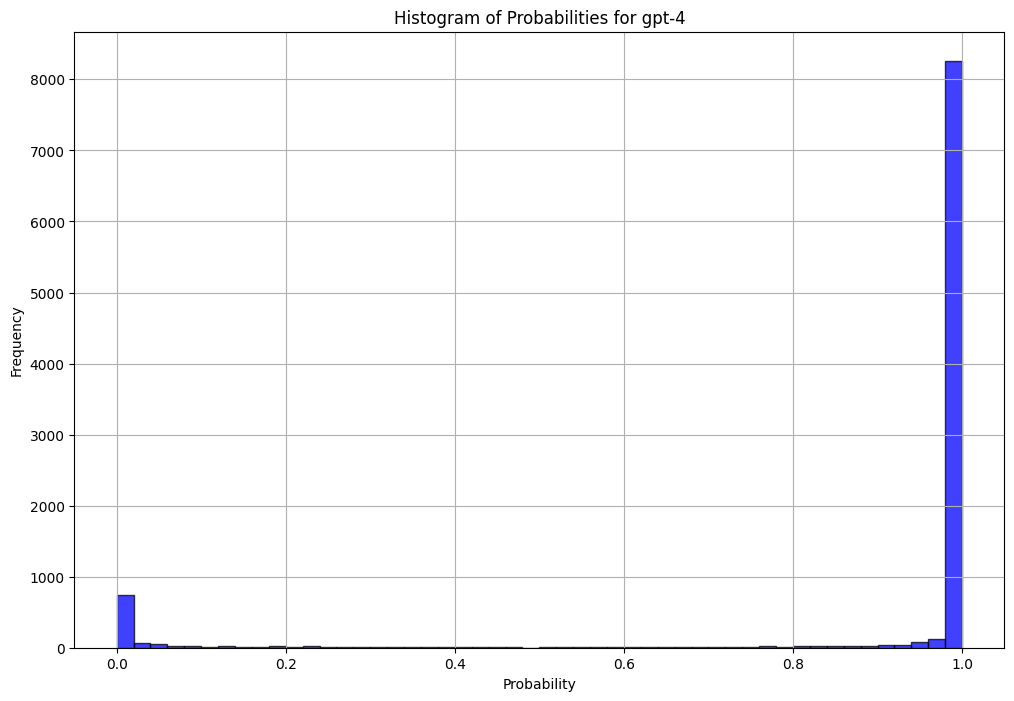

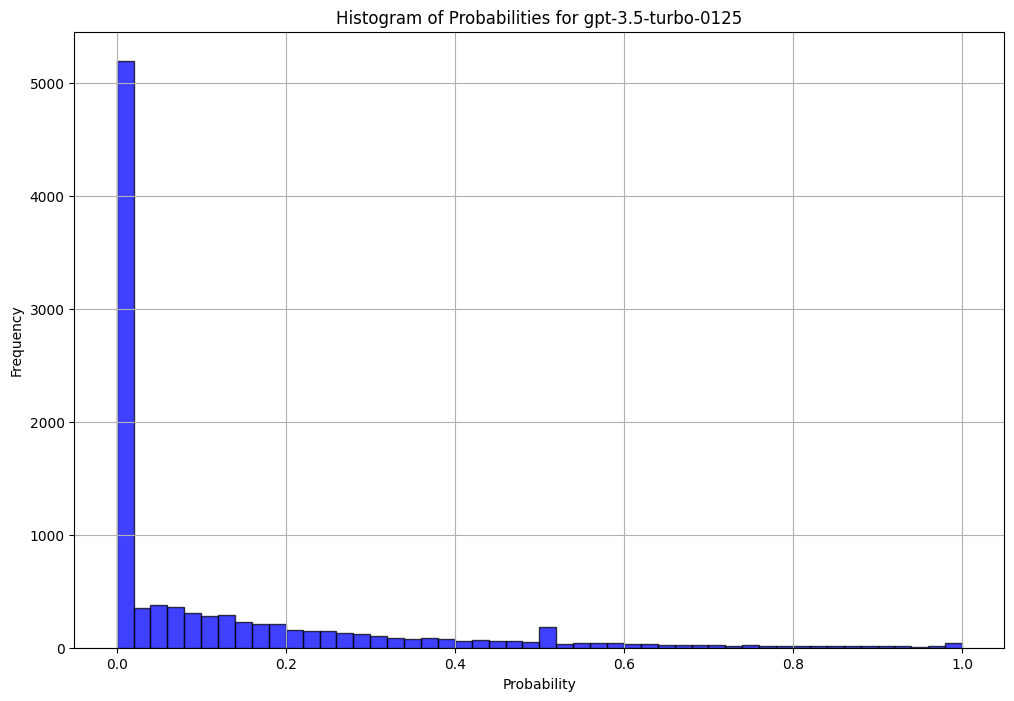

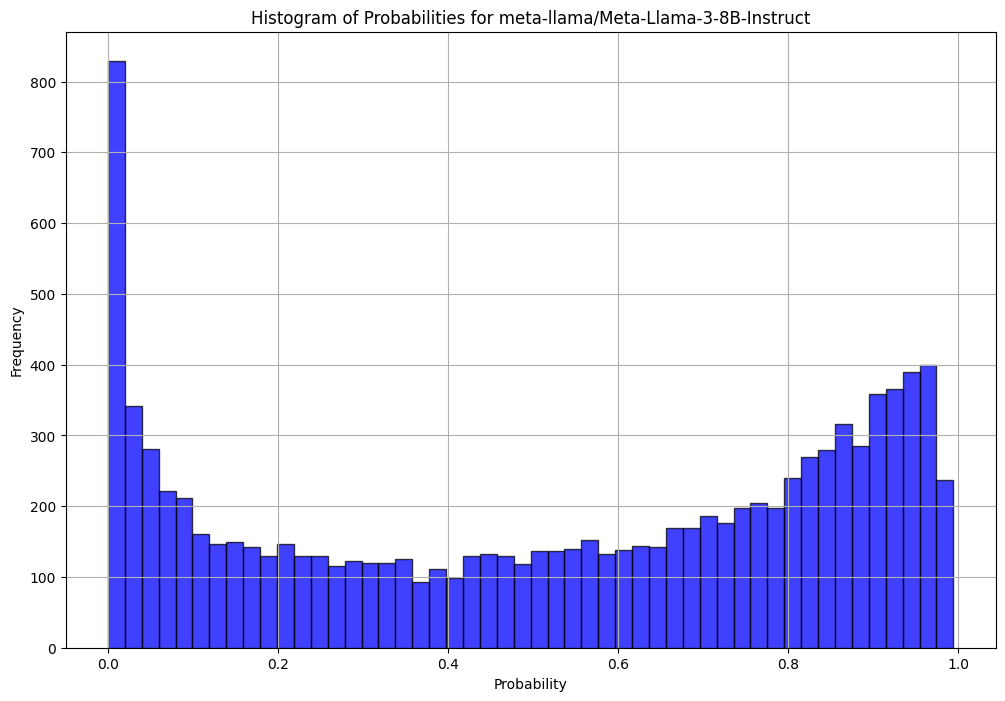

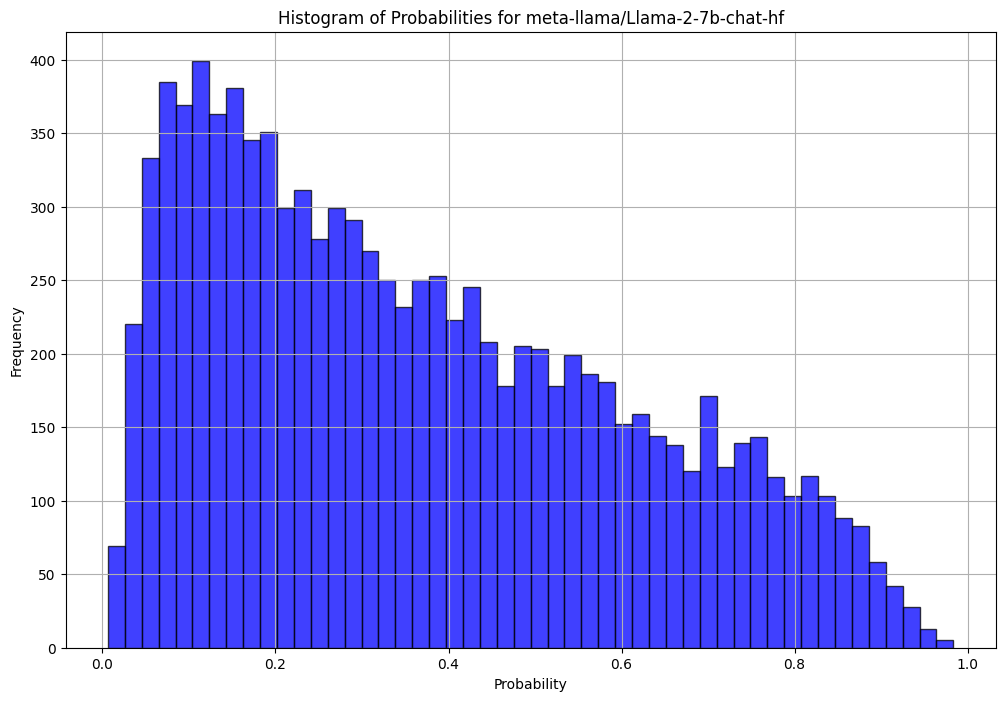

In [99]:
import matplotlib.pyplot as plt

# Plot histograms for each model's probabilities
for model in model_token_map_explicit.keys():
    model_probs = [probs[model] for word, probs in filtered_data.items() if model in probs]
    
    plt.figure(figsize=(12, 8))
    plt.hist(model_probs, bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.title(f'Histogram of Probabilities for {model}')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


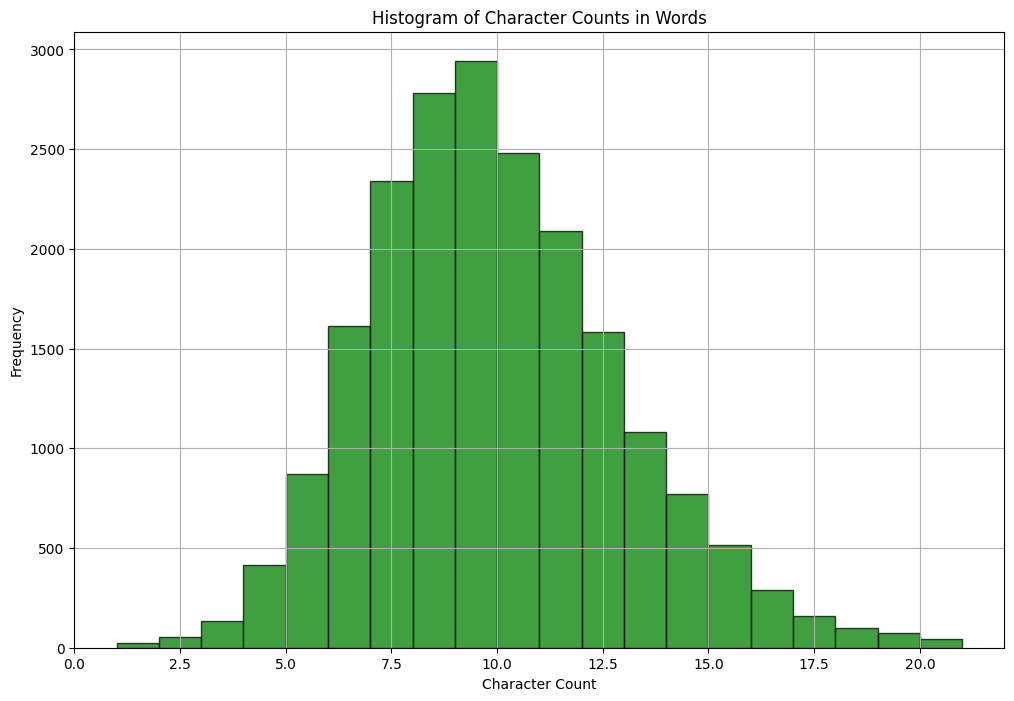

In [103]:
# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Initialize a list to store the character counts
char_counts = []

# Iterate through the data and count the characters in each word
for word in data.keys():
    char_counts.append(len(word))

# Plot a histogram of the character counts
plt.figure(figsize=(12, 8))
plt.hist(char_counts, bins=20, alpha=0.75, color='green', edgecolor='black')
plt.title('Histogram of Character Counts in Words')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


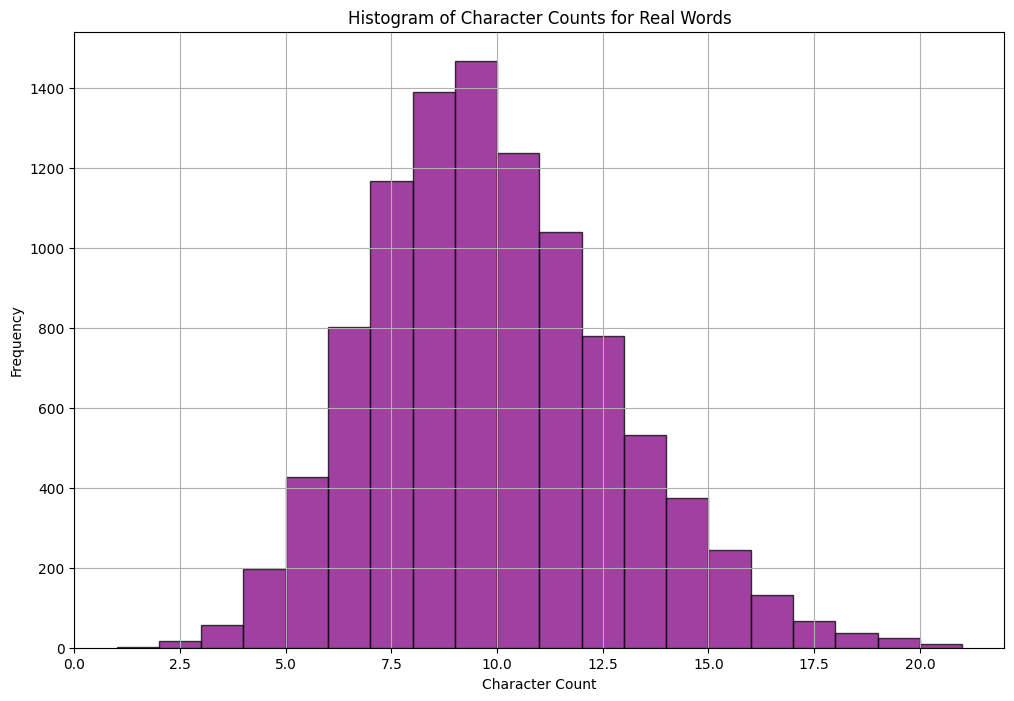

In [106]:
# Load the data from the JSON file
with open('lists/random_words.json', 'r') as f:
    random_words = json.load(f)

# Initialize a list to store the character counts
random_char_counts = []

# Iterate through the data and count the characters in each word
for word in random_words:
    random_char_counts.append(len(word))

# Plot a histogram of the character counts
plt.figure(figsize=(12, 8))
plt.hist(random_char_counts, bins=20, alpha=0.75, color='purple', edgecolor='black')
plt.title('Histogram of Character Counts for Real Words')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [112]:
arr = """long
elongated
anaconda
extended
protracted
highway
mile
forever
longitudinal
Longitudinal
Interminable
Serpentine
Extensive
Prolonged
Stretched
Infinite
Boundless
Lengthy
Elongated
Everlasting
Perpetual
Drawn-out
Lingering
Monumental
Skyscraper
Towering
Colossal
Gargantuan
Astronomical
Immeasurable
Unending
Continuous
Enduring
Sustained
Panoramic
Sprawling
Expansive
Meandering
Neverending
Limitless
Voluminous
Far-reaching
Perennial
Unfathomable
Interstellar
Intergalactic
Transcontinental
Marathon
Odyssey
Horizon
Eternity
Millennium
Constellation
Extendable
Telescope
Locomotive
Suspension bridge
Sequoia
Stratosphere
Long
Elongated
Anaconda
Extended
Protracted
Highway
Mile
Forever
Lengthy
Stretched
Marathon
Endless
Bridge
Infinite
Journey
Century
Tunnel
Distance
Elongate
Railroad
River
Horizon
Pathway
Span
Unending
Mile-long
Grand
Uninterrupted
Prolonged
Lasting
Vast
Continuous
Road
Extensive
Drawn-out
Never-ending
Expansive
Universe
Persistence
Lingering
Train
Epic
Stream
Relay
Coastline
Monumental
History
Expedition
Voyage
Streamlined
Lumbering
Tall
Towering
Long
Mile
Far
Vast
Tall
Wide
Huge
Deep
Span
End
Last
Path
Huge
Wide
Year
Walk
Trek
Wide
Tall
Flow
""".lower().strip().split('\n')
arr = list(set(arr))
arr = [s for s in arr if not any (c in s for c in [' ', '-'])]
arr

['road',
 'sequoia',
 'constellation',
 'anaconda',
 'sustained',
 'trek',
 'perennial',
 'distance',
 'coastline',
 'extended',
 'universe',
 'far',
 'lasting',
 'uninterrupted',
 'intergalactic',
 'neverending',
 'long',
 'lengthy',
 'stratosphere',
 'endless',
 'immeasurable',
 'prolonged',
 'extendable',
 'relay',
 'panoramic',
 'stretched',
 'interminable',
 'walk',
 'highway',
 'interstellar',
 'transcontinental',
 'epic',
 'protracted',
 'enduring',
 'meandering',
 'stream',
 'span',
 'mile',
 'railroad',
 'wide',
 'train',
 'pathway',
 'sprawling',
 'expansive',
 'millennium',
 'monumental',
 'towering',
 'extensive',
 'voyage',
 'elongated',
 'lingering',
 'colossal',
 'horizon',
 'continuous',
 'tall',
 'vast',
 'voluminous',
 'boundless',
 'unending',
 'infinite',
 'odyssey',
 'river',
 'everlasting',
 'marathon',
 'bridge',
 'expedition',
 'gargantuan',
 'grand',
 'century',
 'astronomical',
 'journey',
 'streamlined',
 'tunnel',
 'serpentine',
 'telescope',
 'flow',
 'elon

In [113]:
b = """Short
Brief
Tiny
Quick
Snap
Blip
Flash
Blink
Moment
Fleeting
Inch
Glimpse
Nugget
Instant
Bit
Spur
Minute
Shallow
Stint
Snippet
Spark
Twig
Dash
Second
Trivial
Blurt
Jot
Flick
Morsel
Skimpy
Sliver
Pint-sized
Flash
Peep
Nugget
Trickle
Skit
Grain
Whiff
Drop
Drip
Quip
Bite
Bout
Trill
Snipe
Lapse
Wink
Pulse
Chime
Brief
Tiny
Wee
Mini
Petite
Compact
Concise
Terse
Curt
Abrupt
Succinct
Snub
Stubby
Squat
Stunted
Truncated
Clipped
Cropped
Nub
Stump
Dwarf
Runt
Pygmy
Pint-sized
Miniature
Diminutive
Snippet
Morsel
Crumb
Speck
Dot
Dash
Blip
Flash
Instant
Moment
Jiffy
Quick
Rapid
Swift
Fleeting
Transient
Ephemeral
Blink
Snap
Inch
Atom
Mite
Iota
Tad
Abbreviated
Infinitesimal
Microscopic
Diminutive
Momentary
Evanescent
Ephemeral
Truncated
Abridged
Curtailed
Miniaturized
Instantaneous
Condensed
Circumscribed
Minuscule
Abbreviated
Inconsequential
Abbreviated
Imperceptible
Inconspicuous
Abbreviated
Negligible
Monosyllabic
Abbreviated
Insubstantial
Infinitesimal
Abbreviated
Undersized
Surreptitious
Abbreviated
Inconsiderable
Transitory
Abbreviated
Perfunctory
Abbreviated
Unobtrusive
Insignificant
Abbreviated
Attenuated
Ephemeral
Transient
Momentary
Fleeting
Temporary
Microscopic
Impermanent
Infinitesimal
Minuscule
Evaporate
Short-lived
Exiguous
Perishable
Insubstantial
Vanishing
Flimsy
Whimsical
Truncated
Concise
Succinct
Effervescent
Incidental
Shortened
Punctual
Minute-long
Capsulate
Transitional
Circumscribed
Summarized
Unenduring
""".lower().strip().split('\n')
b = list(set(b))
b = [s for s in b if not any (c in s for c in [' ', '-'])]
b

['wee',
 'dash',
 'surreptitious',
 'stint',
 'whiff',
 'blurt',
 'lapse',
 'miniature',
 'abbreviated',
 'summarized',
 'bout',
 'terse',
 'perfunctory',
 'mite',
 'unobtrusive',
 'tad',
 'squat',
 'jiffy',
 'stubby',
 'dot',
 'mini',
 'peep',
 'diminutive',
 'vanishing',
 'quip',
 'flash',
 'inch',
 'monosyllabic',
 'stump',
 'swift',
 'snipe',
 'negligible',
 'bit',
 'nub',
 'crumb',
 'snippet',
 'jot',
 'brief',
 'curt',
 'snub',
 'punctual',
 'whimsical',
 'miniaturized',
 'inconsequential',
 'flimsy',
 'instantaneous',
 'ephemeral',
 'infinitesimal',
 'impermanent',
 'quick',
 'unenduring',
 'temporary',
 'instant',
 'chime',
 'iota',
 'pygmy',
 'attenuated',
 'transitional',
 'transient',
 'microscopic',
 'runt',
 'skit',
 'dwarf',
 'evanescent',
 'glimpse',
 'petite',
 'skimpy',
 'drop',
 'exiguous',
 'condensed',
 'minuscule',
 'second',
 'circumscribed',
 'fleeting',
 'inconsiderable',
 'compact',
 'undersized',
 'evaporate',
 'shortened',
 'tiny',
 'trickle',
 'trivial',
 'i

In [114]:
len(arr), len(b)

(94, 124)

In [117]:
import json

# Save arr to lists/long_coded_words.json
with open('lists/long_coded_words.json', 'w') as f:
    json.dump(arr, f)

# Save b to lists/short_coded_words.json
with open('lists/short_coded_words.json', 'w') as f:
    json.dump(b, f)
